In [33]:
pwd

'/home/wsuser/work/data'

In [34]:
!pip install keras==2.2.4
!pip install tensorflow==2.5.0

# IMAGE PREPROCESSING

In [35]:
import os, types
import pandas as pd
from botocore.client import Config
import ibm_boto3
import os, types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0
import os, types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
cos_client = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='qeDqwC79iRzC9aCmvZa-e7O_s53nbgt-zbF2fG-9aIGP',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.private.us.cloud-object-storage.appdomain.cloud')

bucket = 'imageclassification-donotdelete-pr-g7epqhkbzlxssg'
object_key = 'Classification of Arrhythmia by Using Deep Learning with 2-D ECG Spectral Image Representation.zip'

streaming_body_5 = cos_client.get_object(Bucket=bucket, Key=object_key)['Body']

# Your data file was loaded into a botocore.response.StreamingBody object.
# Please read the documentation of ibm_boto3 and pandas to learn more about the possibilities to load the data.
# ibm_boto3 documentation: https://ibm.github.io/ibm-cos-sdk-python/
# pandas documentation: http://pandas.pydata.org/


In [36]:
#unzipping your data file
from io import BytesIO
import zipfile
unzip=zipfile.ZipFile(BytesIO(streaming_body_5.read()),'r')
file_paths=unzip.namelist()
for path in file_paths:
    unzip.extract(path)

In [47]:
ls

'Left Bundle Branch Block'/      'Premature Ventricular Contractions'/
 Normal/                         'Right Bundle Branch Block'/
'Premature Atrial Contraction'/  'Ventricular Fibrillation'/


In [48]:
pwd

'/home/wsuser/work/data/data/test'

In [51]:
import os
filenames=os.listdir('/home/wsuser/work/data/data/train')

In [52]:
 from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [53]:
# setting parameters for data augmentation for training data
train_datagen=ImageDataGenerator(rescale=1./255,shear_range=0.2,zoom_range=0.2,horizontal_flip=True)

In [54]:
# data augmentation to the testing data
test_datagen=ImageDataGenerator(rescale=1./255)

In [55]:
#performing data augmentation to train data
x_train=train_datagen.flow_from_directory(directory=r'/home/wsuser/work/data/data/train',target_size=(64,64),batch_size=32,class_mode='categorical')

Found 15341 images belonging to 6 classes.


In [57]:
x_test=test_datagen.flow_from_directory(directory=r'/home/wsuser/work/data/data/test',target_size=(64,64),batch_size=32,class_mode='categorical')

Found 6825 images belonging to 6 classes.


In [58]:
#Lets see the classes the different types of arrythmia is stored in
x_train.class_indices

{'Left Bundle Branch Block': 0,
 'Normal': 1,
 'Premature Atrial Contraction': 2,
 'Premature Ventricular Contractions': 3,
 'Right Bundle Branch Block': 4,
 'Ventricular Fibrillation': 5}

# MODEL BUILDING

MODEL BUILDING- IMPORTING LIBRARIES

In [59]:
import numpy as np
import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers

from tensorflow.keras.layers import Dense,Flatten

from tensorflow.keras.layers import Conv2D,MaxPooling2D
import tensorflow.keras

In [61]:
model=Sequential()

# Adding CNN Layers

In [62]:
model.add(Conv2D(32,(3,3),input_shape=(64,64,3),activation='relu')) #Activation Function
model.add(MaxPooling2D(pool_size=(2,2))) #Downsampling Purposes
model.add(Conv2D(32,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten()) #Flatten the dimensions of the image

# ADDING DENSE LAYERS

In [63]:
model.add(Dense(32))# Deeply connected neural network layers
model.add(Dense(6,activation='softmax'))#Output layer with 6 neurons

In [64]:
#Summary of the model
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 62, 62, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 29, 29, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 6272)              0         
_________________________________________________________________
dense (Dense)                (None, 32)                200736    
_________________________________________________________________
dense_1 (Dense)              (None, 6)                

EVALUATING LOSS FUNCTION

In [65]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [66]:
len(x_train)

480

# TRAINING THE MODEL

In [67]:
model.fit_generator(generator=x_train,steps_per_epoch = len(x_train), epochs=10, validation_data=x_test,validation_steps = len(x_test))

/opt/conda/envs/Python-3.9/lib/python3.9/site-packages/tensorflow/python/keras/engine/training.py:1940: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/10
480/480 [==============================] - 78s 163ms/step - loss: 0.6399 - accuracy: 0.7914 - val_loss: 0.4345 - val_accuracy: 0.8668
Epoch 2/10
480/480 [==============================] - 79s 164ms/step - loss: 0.2679 - accuracy: 0.9222 - val_loss: 0.3875 - val_accuracy: 0.8705
Epoch 3/10
480/480 [==============================] - 78s 163ms/step - loss: 0.2117 - accuracy: 0.9368 - val_loss: 0.3548 - val_accuracy: 0.8920
Epoch 4/10
480/480 [==============================] - 79s 164ms/step - loss: 0.1809 - accuracy: 0.9458 - val_loss: 0.3665 - val_accuracy: 0.8734
Epoch 5/10
480/480 [==============================] - 78s 162ms/step - loss: 0.1553 - accuracy: 0.9538 - val_loss: 0.2607 - val_accuracy: 0.9253
Epoch 6/10
480/480 [==============================] - 78s 162ms/step - loss: 0.1298 - accuracy: 0.9606 - val_loss: 0.2758 - val_accuracy: 0.9313
Epoch 7/10
480/480 [==============================] - 79s 165ms/step - loss: 0.1246 - accuracy: 0.9625 - val_loss: 0.2571 - val_ac

# SAVING THE MODEL

In [68]:
ls

'Left Bundle Branch Block'/      'Premature Ventricular Contractions'/
 Normal/                         'Right Bundle Branch Block'/
'Premature Atrial Contraction'/  'Ventricular Fibrillation'/


In [71]:
pwd

'/home/wsuser'

In [72]:
model.save('ECG_Classification.h5')

In [74]:
ls

ECG_Classification.h5  jars/  work/


In [75]:
!tar -zcvf ECG-Arrythmia-model_new.tgz ECG_Classification.h5

ECG_Classification.h5


In [76]:
ls -1

ECG-Arrythmia-model_new.tgz
ECG_Classification.h5
jars/
work/


# Test the model

In [82]:
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [84]:
#load the model
model=load_model('/home/wsuser/ECG_Classification.h5')

In [85]:
#Loading of image
img=image.load_img(r'/home/wsuser/work/data/test/Premature Ventricular Contractions/fig_5660.png',target_size=(64,64))


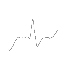

In [86]:
img

In [88]:
#Converting image to array
x=image.img_to_array(img)

In [89]:
x

array([[[255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.]],

       [[255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.]],

       [[255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.]],

       ...,

       [[255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.]],

       [[255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.]],

       [[255., 255., 255.],
        [255., 255., 255.],
        [255., 2

In [91]:
#Changing the shape
x=np.expand_dims(x,axis=0)

In [92]:
x

array([[[[[255., 255., 255.],
          [255., 255., 255.],
          [255., 255., 255.],
          ...,
          [255., 255., 255.],
          [255., 255., 255.],
          [255., 255., 255.]],

         [[255., 255., 255.],
          [255., 255., 255.],
          [255., 255., 255.],
          ...,
          [255., 255., 255.],
          [255., 255., 255.],
          [255., 255., 255.]],

         [[255., 255., 255.],
          [255., 255., 255.],
          [255., 255., 255.],
          ...,
          [255., 255., 255.],
          [255., 255., 255.],
          [255., 255., 255.]],

         ...,

         [[255., 255., 255.],
          [255., 255., 255.],
          [255., 255., 255.],
          ...,
          [255., 255., 255.],
          [255., 255., 255.],
          [255., 255., 255.]],

         [[255., 255., 255.],
          [255., 255., 255.],
          [255., 255., 255.],
          ...,
          [255., 255., 255.],
          [255., 255., 255.],
          [255., 255., 255.]],



In [98]:
x_train.class_indices

{'Left Bundle Branch Block': 0,
 'Normal': 1,
 'Premature Atrial Contraction': 2,
 'Premature Ventricular Contractions': 3,
 'Right Bundle Branch Block': 4,
 'Ventricular Fibrillation': 5}

In [100]:
index=['left Bundle Branch block','Normal','Premature Atrial Contraction','Premature Ventricular Contraction','Right Bundle Branch Block','Ventricular Fibrillation']


# IBM Deployment

In [102]:
#Installing amchine learning service
!pip install watson-machine-learning-client

     |████████████████████████████████| 538 kB 19.2 MB/s eta 0:00:01


In [121]:
#Replace the credentials that you got from Watson Machine Learning Service
from ibm_watson_machine_learning import APIClient
wml_credentials={
    "url":"https://us-south.ml.cloud.ibm.com",
    "apikey":"1BsYiy1byg98ByElNCxXh01pwMQPKW5pEqxaD464Bcfz"
}
client=APIClient(wml_credentials)


In [119]:
client

In [122]:
client=APIClient(wml_credentials)

In [123]:
def guid_from_space_name(client,space_name):
    space=client.spaces.get_details()
    #print(space)
    return(next(item for item in space['resources'] if item['entity']["name"]==space_name)['metadata']['id'])


In [124]:
space_uid=guid_from_space_name(client, 'Newsace')
print("space UID="+ space_uid)

space UID=4dc78503-905a-4e45-bbf8-894af38c26ba


In [125]:
client.set.default_space(space_uid)

'SUCCESS'

In [126]:
client.software_specifications.list(200)

-------------------------------  ------------------------------------  ----
NAME                             ASSET_ID                              TYPE
default_py3.6                    0062b8c9-8b7d-44a0-a9b9-46c416adcbd9  base
kernel-spark3.2-scala2.12        020d69ce-7ac1-5e68-ac1a-31189867356a  base
pytorch-onnx_1.3-py3.7-edt       069ea134-3346-5748-b513-49120e15d288  base
scikit-learn_0.20-py3.6          09c5a1d0-9c1e-4473-a344-eb7b665ff687  base
spark-mllib_3.0-scala_2.12       09f4cff0-90a7-5899-b9ed-1ef348aebdee  base
pytorch-onnx_rt22.1-py3.9        0b848dd4-e681-5599-be41-b5f6fccc6471  base
ai-function_0.1-py3.6            0cdb0f1e-5376-4f4d-92dd-da3b69aa9bda  base
shiny-r3.6                       0e6e79df-875e-4f24-8ae9-62dcc2148306  base
tensorflow_2.4-py3.7-horovod     1092590a-307d-563d-9b62-4eb7d64b3f22  base
pytorch_1.1-py3.6                10ac12d6-6b30-4ccd-8392-3e922c096a92  base
tensorflow_1.15-py3.6-ddl        111e41b3-de2d-5422-a4d6-bf776828c4b7  base
autoai-kb_rt

In [127]:
software_spec_uid = client.software_specifications.get_uid_by_name("tensorflow_rt22.1-py3.9")
software_spec_uid

'acd9c798-6974-5d2f-a657-ce06e986df4d'

In [128]:
model_details = client.repository.store_model(model='ECG-Arrythmia-model_new.tgz',meta_props={
    client.repository.ModelMetaNames.NAME:"CNN",
    client.repository.ModelMetaNames.TYPE:"tensorflow_2.7",
    client.repository.ModelMetaNames.SOFTWARE_SPEC_UID:software_spec_uid
})

In [134]:
model_id=client.repository.get_model_uid(model_details)

This method is deprecated, please use get_model_id()


In [130]:
model_id

'c7a98f28-93ab-46d1-977a-9d6f7079bfd2'

In [137]:
client.repository.download(model_id,'model.tar2.gz')

Successfully saved model content to file: 'model.tar2.gz'


'/home/wsuser/model.tar2.gz'